# Импорты

In [1]:
from datetime import date, datetime

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

from catboost import Pool

import matplotlib.pyplot as plt

# Функции

In [2]:
def cat_num_split(df: pd.DataFrame) -> tuple:
    '''Ищем категориальные и числовые признаки в датафрейме'''

    cat_columns = []
    num_columns = []

    for column_name in df.columns:
        if (df[column_name].dtypes == object):
            cat_columns += [column_name]
        else:
            num_columns += [column_name]

    print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))
    print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

    return cat_columns, num_columns

In [3]:
def target_columns_dropper(df: pd.DataFrame) -> pd.DataFrame:
    '''Сбрасываем столбцы с целевыми переменными ответа банков'''
    df = df.copy()
    banks = ['BankA_decision',
             'BankB_decision',
             'BankC_decision',
             'BankD_decision',
             'BankE_decision']
    try:
        df.drop(banks, axis='columns', inplace=True)
    except:
        print('Dataframe have not target columns')

    return df

In [4]:
def CarierLevel_feature_creator_v2(df:pd.DataFrame)->pd.Series:
    """
    Категорийный признак "Карьерный уровень клиента".
    Возвращает примерно такой состав данных:
    НЕТ_ДАННЫХ       2293
    НИЗШЕЕ_ЗВЕНО     1385
    СРЕДНЕЕ_ЗВЕНО    1104
    МЕН1              907
    НЕРАЗОБРАНО       752
    ДИР2              533
    МЕН2              523
    САМ               520
    ИП                390
    ДИР1              226
    ЗАМДИР            124
    ЗАМНАЧ             30
    Name: Position, dtype: int64
    """
    f = df['Position'].copy()
    f = f.str.lower()
    f = f.str.strip()
    f1 = f
    L_7 = [
    "генеральный директор",
    "генеральный дирекор",
    "генеральный",
    "гене",
    "генер",
    "генера",
    "ген дир",
    "ген",
    "учредитель",
    'полномочный представитель президента'
    ]
    for s in L_7:
       f1 = f1.mask(lambda  x : x == s, other = 'ДИР1')
    L_6 = [
    "директор",
    "руководитель",
    "директор филиала/ департамента",
    'директор магазина',
    'дир',
    'дире'
    ]
    for s in L_6:
       f1 = f1.mask(lambda  x : x == s, other = 'ДИР2')
    L_5 = [
    "заместитель директора",
    "заместитель генерального директора",
    'заместитель директора',
    "зам",
    "коммерческий директор",
    "заместитель / и.о. генерального директора",
    "и.о. заместитель ген. директора по развитию",
    "зам.руководителя"
    ]
    for s in L_5:
       f1 = f1.mask(lambda  x : x == s, other = 'ЗАМДИР')
    L_4 = [
      "старший менеджер",
      "старший мене",
      "старший менедж",
      "ведущий менеджер",
      "главный менеджер",
      "главный специалист",
      'главный спе'
      "главный инженер",
      "менеджер",
      "мене",
      "менед",
      "руков",
      "руко",
      "рук",
      "главный бухгалтер",
      'главный бух',
      "начальник отдела",
      "начальник",
      "продюсер",
      "руководитель отдела",
      "менеджер по работе с ключевыми клиентами",
      "начальнык отдела",
      "начальник п",
      'менеджер по работе с маркетплейсами',
      'руководитель колл-центра',
      'начальник участка',
      'руководитель отдела продаж',
      'региональный менеджер',
      'директор по развитию',
      'заведующая отделением',
      'старший администратор'
    ]
    for s in L_4:
       f1 = f1.mask(lambda  x : x == s, other = 'МЕН1')
    L_3 = [
     "администратор",
     "админи",
     "адм",
     "вдминистратор",
     "управляющий",
     "управляющая",
     "менеджер по продажам",
     "специалист по продажам",
     "менедж",
     "мастер",
     "маст",
     "оператор склада",
     "менеджер по работе с маркетплейсами",
     'руководитель колл-центра', 'заведующий складом',
     'менеджер по закупкам','менеджер по закупке',
     'старший продавец',
     'менеджер торговой зоны',
     'старший сотрудник охраны',
     'командир отдедения',
     'старший кладовщик',
     'старший продавец-консультант',
     'заведующий'

     ]
    for s in L_3:
       f1 = f1.mask(lambda  x : x == s, other = 'МЕН2')
    L_2 = [
   "старший специалист",
   "старший спец",
   "ведущий специалист",
   'ведущий спе',
   'логопед',
   'психолог',
   'воспит',
   'дизайнер',
   "товаровед",
   "маркетолог",
   "бухгалтер",
   'бухга',
   'бухг'
   "бух",
   'бух',
   "преподаватель",
   "препо",
   "учитель",
   "инженер",
   "инж",
   "оператор",
   "врач",
   "программист",
   "графический дизайнер",
   "репетитор",
   "технолог",
   "экономист",
   "юрист",
   "адвокат",
   "председатель",
   "машинист",
   "хормейстер",
   "ведущий инженер",
   "старший слесарь",
   "системный администратор",
   "воспитатель",
   "эксперт",
   "доцент",
   "финансовый консультант",
   "аналитик",
   'средний медперсонал',
   'маркето',
   'режиссер',
   'режиссер',
   'музыкальный р',
   'кассир-контролер',
   'секретарь',
   'риэлтор',
   'педагог',
   'пластический хирург'
   ]
    for s in L_2:
      f1 = f1.mask(lambda  x : x == s, other = 'СРЕДНЕЕ_ЗВЕНО')
    L_1 = [
     "специалист",
     "спец",
     "специ",
     "водитель",
     "продавец",
     "прода",
     "повар",
     "официант",
     "курьер",
     "консультант",
     "продавец-консультант",
     "продавец консультан",
     "продавец-кассир",
     "кладовщик",
     "косметолог",
     "сотрудник охраны",
     "слесарь",
     "сле",
     "кассир",
     "массажист",
     "электромонтер",
     "монтажник",
     "мастер маникюра",
     "электрик",
     "элек",
     "торговый представитель",
     "механик",
     "супервайзер",
     "инструктор",
     "персональный менеджер",
     "водитель-экспедитор",
     "водит",
     "продавец кассир",
     "рабочий",
     'сварщик',
     'свар',
     'агент',
     'диспетчер',
     'медицинская сестра',
     'медсестра',
     'токарь',
     "офи",
     'тренер',
     'владелец',
     'психолог-консультант',
     'помощник юриста',
     "швея",
     "парикмахер",
     "техник",
     'охранник',
     'няня',
     'косметолог-визажист',
     'сотрудник',
     'сотрудник склада',
     'кондитер',
     'фельдшер',
     'формовщик',
     'маляр',
     'проходчик',
     'техперсонал',
     'строитель',
     'клад',
     'наставник',
     'уборщица',
     'оптометрист',
     'пекарь',
     'официа',
     'контралер',
     'разнорабочая',
     'кладов',
     'комплектовщик',
     'термист'
     ]
    for s in L_1:
      f1 = f1.mask(lambda  x : x == s, other = 'НИЗШЕЕ_ЗВЕНО')
    f1 = f1.mask(lambda x : x == "индивидуальный предприниматель", other = 'ИП')
    f1 = f1.mask(lambda x : x == "инд", other = 'ИП')
    f1 = f1.mask(lambda x : x == "ип", other = 'ИП')
    f1 = f1.mask(lambda x : x == "самозанятый", other = 'САМ')
    f1 = f1.mask(lambda x : x == "самозанятая", other = 'САМ')
    f1=f1.fillna('НЕТ_ДАННЫХ')
    Filled = ['ДИР1','ДИР2', 'МЕН1', 'МЕН2','ИП','САМ',
              'ЗАМДИР','ЗАМНАЧ', 'НИЗШЕЕ_ЗВЕНО', 'СРЕДНЕЕ_ЗВЕНО', 'НЕТ_ДАННЫХ']
    # Названия должностей которые входят в некоторую строку.
    f1[f1.str.contains('рабочий')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('слесарь')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('помощник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('сборщик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('руководитель')] = 'МЕН1'
    f1[f1.str.contains('начальник ')] = 'МЕН1'
    f1[f1.str.contains('самоз')] = 'САМ'
    f1[f1.str.contains('инспектор')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('инженер')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('врач')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('вра')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('фармацевт')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('старший специалист')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('представитель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('преподаватель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('ведущий')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('бухг')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('учитель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('заместитель директора')] = 'ЗАМДИР'
    f1[f1.str.contains('заместитель')] = 'ЗАМНАЧ'
    f1[f1.str.contains('заме')] = 'ЗАМНАЧ'
    f1[f1.str.contains('оператор')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('лаборант')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('электрик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продавец')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('сварщик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('менеджер')] = 'МЕН2'
    f1[f1.str.contains('главный специалист')] = 'МЕН2'
    f1[f1.str.contains('специалист')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('монтажник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('водитель ')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('парикмахер')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('ногтевого')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('санитарка')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продав')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('монтер')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('техник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('директор')] = 'ДИР2'
    #f1 = f1[~f1.isin(Filled)] # Временно убираем обработанные строки.
    f1[~f1.isin(Filled)] = "НЕРАЗОБРАНО"
    #print(contain_values)
    CarierLevel = f1

    return CarierLevel

In [49]:
def create_cat_pool(
        df: pd.DataFrame, 
        feature_name: str
        ) -> tuple:
    '''Создаем тренировочный и валидационный набор для CatBoost'''
    X = df.drop(feature_name, axis=1)
    y = df[feature_name]
    features_names = list(X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    cat_features, num_features = cat_num_split(X)
    train_data = Pool(
        data=X_train, 
        label=y_train,
        cat_features=cat_features,
        feature_names=features_names
    )
    eval_data = Pool(
        data=X_test,
        label=y_test,
        cat_features=cat_features,
        feature_names=features_names
    )

    return train_data, eval_data, features_names

In [38]:
def create_cls_model(
        train_data,
        eval_data,
        features_names
        ) -> CatBoostClassifier:
    '''Создаем модель классификатора CatBoost'''
    model = CatBoostClassifier(task_type="GPU", iterations=5000, early_stopping_rounds=100)
    model.fit(X=train_data, eval_set=eval_data)

    ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)
    sorted = np.argsort(ftr_imp)
    ypos = np.arange(len(np.array(features_names)))
    fig = plt.figure(figsize=(8, 8))
    plt.barh(ypos, ftr_imp[sorted])
    plt.xlim([0, 1])
    plt.title('Распределение весов входных параметров')
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, np.array(features_names)[sorted]);
    plt.show()

    return model

In [39]:
def create_reg_model(
        train_data,
        eval_data,
        features_names
        ) -> CatBoostRegressor:
    '''Создаем модель классификатора CatBoost'''
    model = CatBoostRegressor(task_type="GPU", iterations=5000, early_stopping_rounds=100)
    model.fit(X=train_data, eval_set=eval_data)

    ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)
    sorted = np.argsort(ftr_imp)
    ypos = np.arange(len(np.array(features_names)))
    fig = plt.figure(figsize=(8, 8))
    plt.barh(ypos, ftr_imp[sorted])
    plt.xlim([0, 1])
    plt.title('Распределение весов входных параметров')
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, np.array(features_names)[sorted]);
    plt.show()

    return model

In [65]:
def datetime_to_timestamp(x):
    '''Переводим дату-время в timestamp'''

    return x // 10 ** 9 

# Загружаем датасет

In [50]:
df = pd.read_csv(
    filepath_or_buffer='SF_Mandarin_dataset_ver3_csv.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate']
    )
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6464 entries, 1.0 to 8787.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          6464 non-null   datetime64[ns]
 1   education          6464 non-null   object        
 2   employment status  6464 non-null   object        
 3   Value              6464 non-null   object        
 4   JobStartDate       6464 non-null   datetime64[ns]
 5   Position           6464 non-null   object        
 6   MonthProfit        6464 non-null   float64       
 7   MonthExpense       6464 non-null   float64       
 8   Gender             6464 non-null   float64       
 9   Family status      6464 non-null   object        
 10  ChildCount         6464 non-null   float64       
 11  SNILS              6464 non-null   float64       
 12  BankA_decision     6464 non-null   object        
 13  BankB_decision     6464 non-null   object        
 14  BankC_dec

Разделяю исходную выборку на тренировочный датасет, на котором буду учить модели, и тестовую часть, на которой потом буду испытывать метрику качества заполнения.

In [53]:
df_train, df_test, _, _ = train_test_split(df,
                                           df['BankA_decision'],
                                           shuffle=True,
                                           test_size=0.2,
                                           random_state=42)

In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293 entries, 3099.0 to 1266.0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BirthDate          1293 non-null   datetime64[ns]
 1   education          1293 non-null   object        
 2   employment status  1293 non-null   object        
 3   Value              1293 non-null   object        
 4   JobStartDate       1293 non-null   datetime64[ns]
 5   Position           1293 non-null   object        
 6   MonthProfit        1293 non-null   float64       
 7   MonthExpense       1293 non-null   float64       
 8   Gender             1293 non-null   float64       
 9   Family status      1293 non-null   object        
 10  ChildCount         1293 non-null   float64       
 11  SNILS              1293 non-null   float64       
 12  BankA_decision     1293 non-null   object        
 13  BankB_decision     1293 non-null   object        
 14  BankC_

In [56]:
df_test.to_csv('test_data.csv', sep=';', index=True)

In [57]:
df = df_train.copy()

In [58]:
# Сбрасываем целевые метки
df = target_columns_dropper(df)

In [59]:
cat_columns, num_columns = cat_num_split(df)

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  6
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10


In [60]:
df['BirthDate'] = df['BirthDate'].dt.year
#df['BirthDate'] = df['BirthDate'].astype(np.int64)
#df['BirthDate'] = df['BirthDate'].apply(datetime_to_timestamp)

In [61]:
df['JobStartDate'] = df['JobStartDate'].dt.year
#df['JobStartDate'] = df['JobStartDate'].astype(np.int64)
#df['JobStartDate'] = df['JobStartDate'].apply(datetime_to_timestamp)

In [62]:
df['Position'] = CarierLevel_feature_creator_v2(df)

In [63]:
df.head(3)

,BirthDate,education,employment status,Value,JobStartDate,Position,MonthProfit,MonthExpense,Gender,Family status,ChildCount,SNILS,Merch_code,Loan_amount,Loan_term,Goods_category
SkillFactory_Id,,,,,,,,,,,,,,,,
1187.0,1989,Высшее - специалист,Работаю по найму полный рабочий день/служу,4 - 5 лет,2018,СРЕДНЕЕ_ЗВЕНО,120000.0,43000.0,0.0,Женат / замужем,0.0,0.0,19.0,8000.0,6.0,Medical_services
3888.0,2002,Высшее - специалист,Работаю по найму полный рабочий день/служу,3 - 4 года,2020,МЕН2,150000.0,30000.0,0.0,Никогда в браке не состоял(а),0.0,0.0,17.0,125000.0,18.0,Medical_services
8160.0,2000,Высшее - специалист,Собственное дело,4 - 5 лет,2018,ДИР1,234000.0,34500.0,0.0,Женат / замужем,0.0,0.0,18.0,55000.0,12.0,Medical_services


# Создаем файлы моделей

Для классификационных моделей: 'education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_term'

Для регрессионных моделей: 'MonthProfit', 'MonthExpense', 'Loan_amount'

Не делаю моделей: 'BirthDate', 'JobStartDate'

## Классификационная

In [86]:
df['Loan_term'].unique()

array([ 6., 18., 12., 24.])

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  6
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount'] 
 len =  9
Learning rate set to 0.06007
0:	learn: 1.2182132	test: 1.2190090	best: 1.2190090 (0)	total: 8.97ms	remaining: 44.8s
1:	learn: 1.0849763	test: 1.0860606	best: 1.0860606 (1)	total: 16.4ms	remaining: 41s
2:	learn: 0.9752556	test: 0.9766172	best: 0.9766172 (2)	total: 24.2ms	remaining: 40.2s
3:	learn: 0.8831872	test: 0.8848346	best: 0.8848346 (3)	total: 31.4ms	remaining: 39.2s
4:	learn: 0.8038066	test: 0.8059454	best: 0.8059454 (4)	total: 38.8ms	remaining: 38.8s
5:	learn: 0.7346124	test: 0.7368651	best: 0.7368651 (5)	total: 45.7ms	remaining: 38.1s
6:	learn: 0.6740877	test: 0.6766498	best: 0.6766498 (6)	total: 52.8ms	remaining: 37.6s
7:	learn: 0.6204598	test: 0.6231459	best: 0.6231459 (7)	total: 59.6ms	remaining: 37.

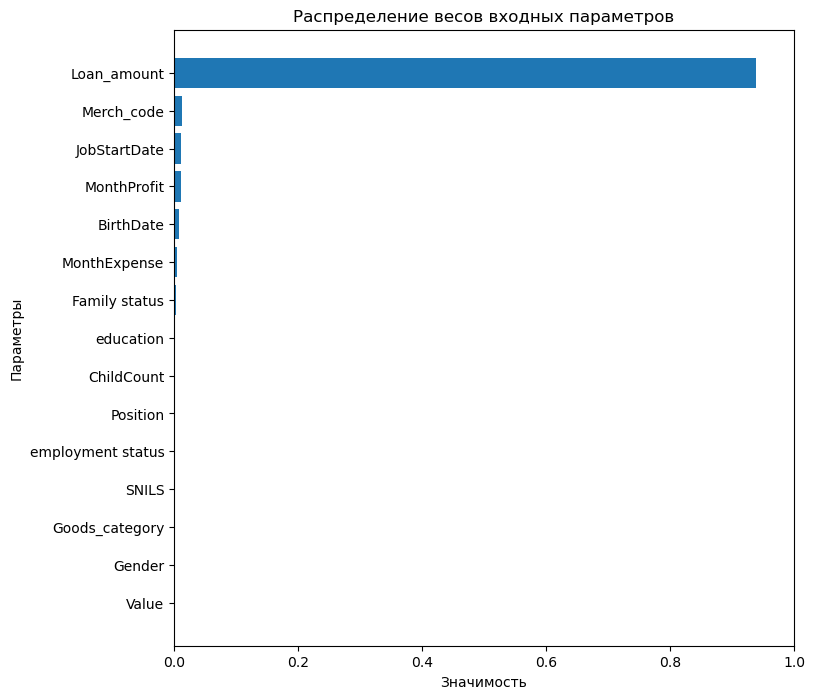

In [87]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'Loan_term')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
model.save_model('Loan_term')

## Регрессионная

categorical columns:	  ['education', 'employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  6
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_term'] 
 len =  9
Learning rate set to 0.045761
0:	learn: 49085.5618035	test: 48130.8022619	best: 48130.8022619 (0)	total: 15.1ms	remaining: 1m 15s
1:	learn: 47036.3561057	test: 46084.3420391	best: 46084.3420391 (1)	total: 37.9ms	remaining: 1m 34s
2:	learn: 45095.8515512	test: 44147.5803805	best: 44147.5803805 (2)	total: 56.9ms	remaining: 1m 34s
3:	learn: 43243.9367944	test: 42299.7615131	best: 42299.7615131 (3)	total: 70.7ms	remaining: 1m 28s
4:	learn: 41485.0479749	test: 40545.3001038	best: 40545.3001038 (4)	total: 84.6ms	remaining: 1m 24s
5:	learn: 39817.1057645	test: 38881.0502902	best: 38881.0502902 (5)	total: 107ms	remaining: 1m 29s
6:	learn: 38239.9080889	test: 37308.3141209	best: 37308.3141209 (6)	total: 130ms	remaining: 1

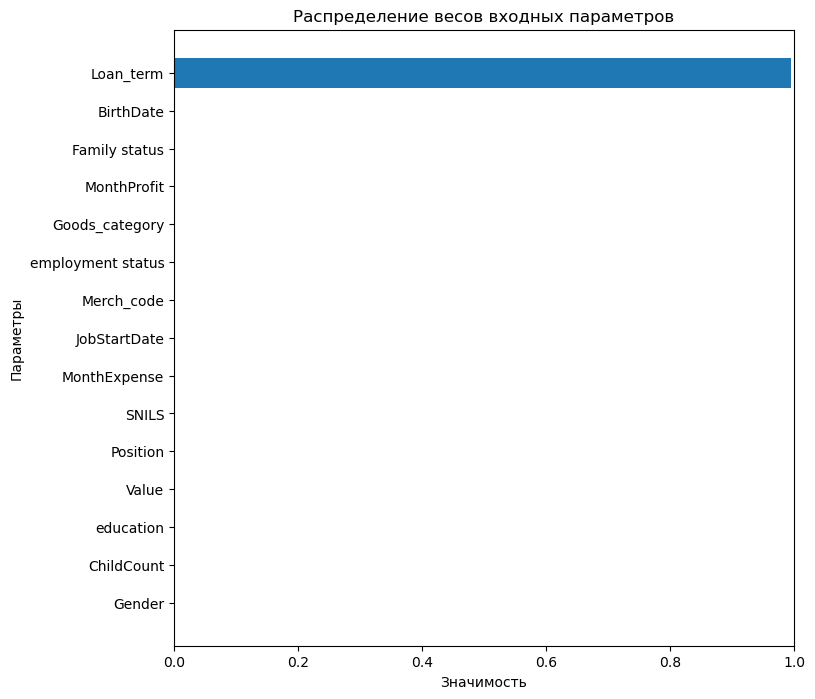

In [90]:
train_data, eval_data, features_names = create_cat_pool(df, 'Loan_amount')
# Обучаем модель
model = create_reg_model(train_data, eval_data, features_names)
model.save_model('Loan_amount.reg')

## Модели для конкретных фич

### Модель для столбца education

In [44]:
df['education'].unique()

array(['Высшее - специалист', 'Среднее', 'Бакалавр',
       'Среднее профессиональное', 'Неоконченное высшее',
       'Несколько высших', 'Магистр', 'Неоконченное среднее',
       'Ученая степень', 'MBA'], dtype=object)

Модель будет однозначно классификационная, так как целевая переменная - 10 вариантов текстовых меток на русском языке.

In [45]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'education')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)

categorical columns:	  ['employment status', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10


CatBoostError: /src/catboost/catboost/private/libs/algo/data.cpp:196: Dataset test #0 contains class label "\xD0\xA3\xD1\x87\xD0\xB5\xD0\xBD\xD0\xB0\xD1\x8F \xD1\x81\xD1\x82\xD0\xB5\xD0\xBF\xD0\xB5\xD0\xBD\xD1\x8C" that is not present in the learn dataset

In [89]:
model.save_model('education.cls')

### Модель для столбца employment status

In [66]:
df['employment status'].unique()

array(['Работаю по найму полный рабочий день/служу', 'Собственное дело',
       'Работаю по найму неполный рабочий день', 'Пенсионер',
       'Декретный отпуск', 'Не работаю', 'Студент'], dtype=object)

categorical columns:	  ['education', 'Value', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10
Learning rate set to 0.06007
0:	learn: 1.7630871	test: 1.7692385	best: 1.7692385 (0)	total: 13.8ms	remaining: 1m 8s
1:	learn: 1.6207036	test: 1.6313225	best: 1.6313225 (1)	total: 25.7ms	remaining: 1m 4s
2:	learn: 1.5064590	test: 1.5196882	best: 1.5196882 (2)	total: 37.5ms	remaining: 1m 2s
3:	learn: 1.4144618	test: 1.4299641	best: 1.4299641 (3)	total: 47.5ms	remaining: 59.3s
4:	learn: 1.3345338	test: 1.3512806	best: 1.3512806 (4)	total: 57.7ms	remaining: 57.6s
5:	learn: 1.2659445	test: 1.2842023	best: 1.2842023 (5)	total: 68.6ms	remaining: 57.1s
6:	learn: 1.2055515	test: 1.2251224	best: 1.2251224 (6)	total: 78.4ms	remaining: 56s
7:	learn: 1.1508074	test: 1.1722859	best: 1.1722859 (7)	total: 88.1ms	remaining: 54.9s
8:	l

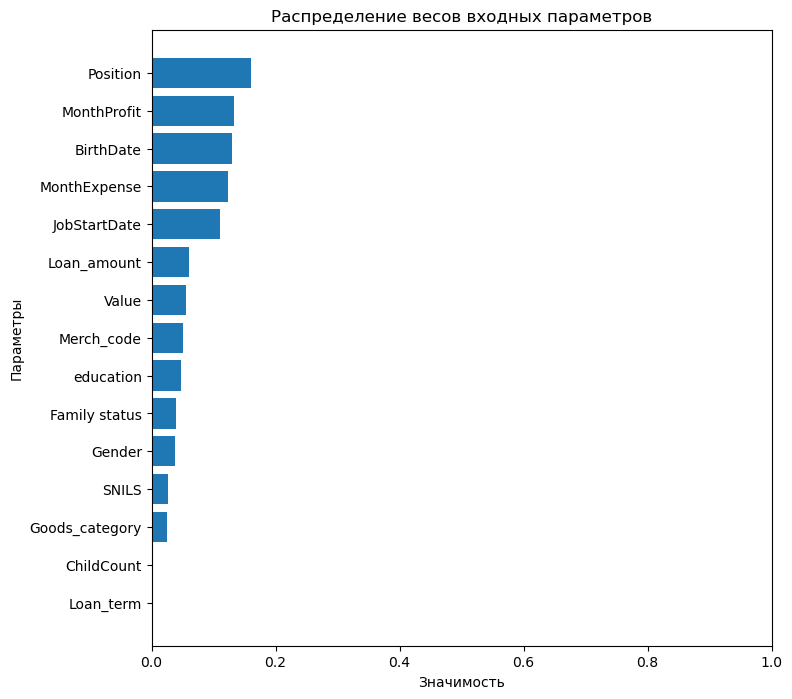

In [67]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'employment status')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
model.save_model('employment status.cls')

### Модель для столбца Value

In [68]:
df['Value'].unique()

array(['4 - 5 лет', '3 - 4 года', '10 и более лет', '5 - 6 лет',
       '8 - 9 лет', '6 - 7 лет', '2 - 3 года', '1 - 2 года', '9 - 10 лет',
       '7 - 8 лет', '6 месяцев - 1 год', '4 - 6 месяцев',
       'менее 4 месяцев'], dtype=object)

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['BirthDate', 'JobStartDate', 'MonthProfit', 'MonthExpense', 'Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Loan_amount', 'Loan_term'] 
 len =  10
Learning rate set to 0.06007
0:	learn: 2.2652262	test: 2.2640679	best: 2.2640679 (0)	total: 15.5ms	remaining: 1m 17s
1:	learn: 2.0876068	test: 2.0843590	best: 2.0843590 (1)	total: 29.9ms	remaining: 1m 14s
2:	learn: 1.9651017	test: 1.9609583	best: 1.9609583 (2)	total: 44.6ms	remaining: 1m 14s
3:	learn: 1.8657100	test: 1.8616840	best: 1.8616840 (3)	total: 58.6ms	remaining: 1m 13s
4:	learn: 1.7843889	test: 1.7816083	best: 1.7816083 (4)	total: 73.1ms	remaining: 1m 13s
5:	learn: 1.7156417	test: 1.7142411	best: 1.7142411 (5)	total: 87.4ms	remaining: 1m 12s
6:	learn: 1.6564343	test: 1.6569614	best: 1.6569614 (6)	total: 100ms	remaining: 1m 11s
7:	learn: 1.6027702	test: 1.6054118	best: 1.6054118 (7)	total: 113ms	re

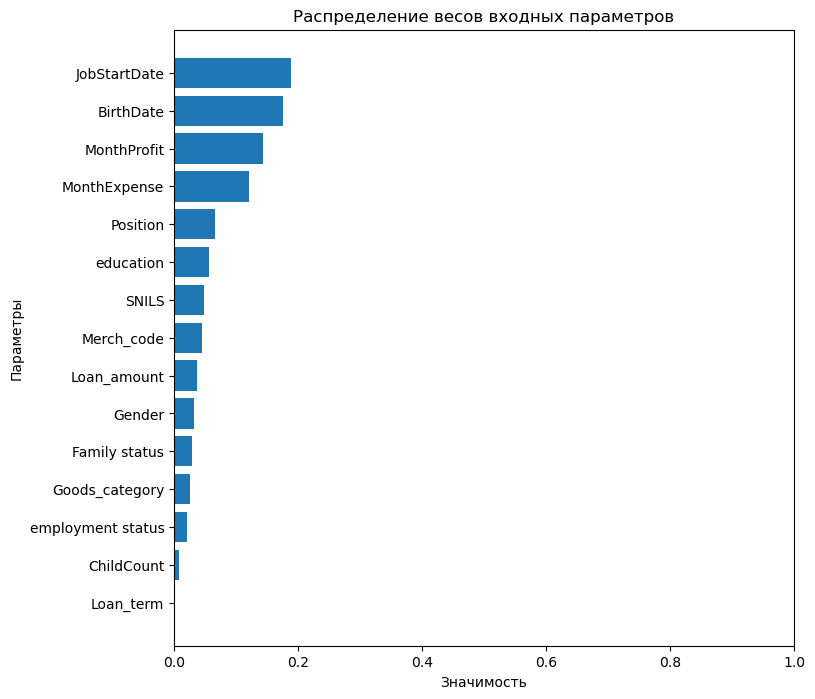

In [69]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'Value')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
model.save_model('Value.cls')